<a href="https://colab.research.google.com/github/Martinez-Cris/Analisis_Hurto_De_Vehiculos_En_Colombia/blob/main/Hurto_a_vehiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/HURTO_A_VEHÍCULOS_23 a 25Col.csv')
df.head()

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,TIPO DELITO,ZONA,CANTIDAD
0,01/01/2023,5,ANTIOQUIA,5042,SANTA FE DE ANTIOQUIA,ARTICULO 239. HURTO MOTOCICLETAS,URBANA,1
1,01/01/2023,5,ANTIOQUIA,5837,TURBO,ARTICULO 239. HURTO MOTOCICLETAS,URBANA,1
2,01/01/2023,76,VALLE DEL CAUCA,76001,CALI,ARTICULO 239. HURTO AUTOMOTORES,URBANA,1
3,01/01/2023,23,CORDOBA,23466,MONTELIBANO,ARTICULO 239. HURTO MOTOCICLETAS,URBANA,1
4,01/01/2023,41,HUILA,41551,PITALITO,ARTICULO 239. HURTO MOTOCICLETAS,RURAL,1


In [ ]:
# Revisar y hacer una limpieza de datos, ver que datos son nulos y que datos estan duplicados

print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

Valores nulos por columna:
FECHA HECHO     0
COD_DEPTO       0
DEPARTAMENTO    0
COD_MUNI        0
MUNICIPIO       0
TIPO DELITO     0
ZONA            0
CANTIDAD        0
YEAR            0
MES             0
dtype: int64

Número de filas duplicadas:
0


In [ ]:
# En que año se presentaron mayor numero de hurtos de motocicletas y automotores
# Segun el documento csv, desde que año estamos analizando los hurtos

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['YEAR'] = df['FECHA HECHO'].dt.year

hurts_by_year = df.groupby('YEAR')['CANTIDAD'].sum()
year_with_max_hurts = hurts_by_year.idxmax()
max_hurts_count_year = hurts_by_year.max()

min_year = df['YEAR'].min()
max_year = df['YEAR'].max()


print(f"El año con el mayor número de hurtos es el año {year_with_max_hurts} con un total de {int(max_hurts_count_year)} hurtos.")
print(f"Estamos analizando los hurtos desde el año {min_year}.")
print(f"Estamos analizando los hurtos hasta el año {max_year}.")

El año con el mayor número de hurtos es el año 2023 con un total de 53297 hurtos.
Estamos analizando los hurtos desde el año 2023.
Estamos analizando los hurtos hasta el año 2025.


In [ ]:
# En que año se presentaron mayor numero de hurtos de motocicletas y automotores

# Ensure 'FECHA HECHO' is datetime and 'YEAR' is extracted
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['YEAR'] = df['FECHA HECHO'].dt.year

hurts_by_year = df.groupby('YEAR')['CANTIDAD'].sum()
year_with_max_hurts = hurts_by_year.idxmax()
max_hurts_count_year = hurts_by_year.max()

print(f"El año con el mayor número de hurtos de motocicletas y automotores es el año {year_with_max_hurts} con un total de {int(max_hurts_count_year)} hurtos.")

El año con el mayor número de hurtos de motocicletas y automotores es el año 2023 con un total de 53297 hurtos.


In [ ]:
# cual fue el numero de hurtos de motocicletas y de automotores por cada año

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['YEAR'] = df['FECHA HECHO'].dt.year

motorcycle_thefts = df[df['TIPO DELITO'] == 'ARTICULO 239. HURTO MOTOCICLETAS']
automobile_thefts = df[df['TIPO DELITO'] == 'ARTICULO 239. HURTO AUTOMOTORES']

motorcycle_thefts_by_year = motorcycle_thefts.groupby('YEAR')['CANTIDAD'].sum().reset_index()
automobile_thefts_by_year = automobile_thefts.groupby('YEAR')['CANTIDAD'].sum().reset_index()

print("Número de hurtos de motocicletas por año:")
print(motorcycle_thefts_by_year)

print("\nNúmero de hurtos de automotores por año:")
print(automobile_thefts_by_year)

Número de hurtos de motocicletas por año:
   YEAR  CANTIDAD
0  2023     41735
1  2024     39757
2  2025     28642

Número de hurtos de automotores por año:
   YEAR  CANTIDAD
0  2023     11562
1  2024     11381
2  2025      7625


In [ ]:
# Determinar por cada año el numero de hurtos en zona rural y urbana

for year in df['YEAR'].unique():
    df_year = df[df['YEAR'] == year]
    hurts_by_zone_year = df_year.groupby('ZONA')['CANTIDAD'].sum().reset_index()
    print(f"\nHurtos por zona en el año {year}:")
    for index, row in hurts_by_zone_year.iterrows():
        print(f"  {row['ZONA']}: {int(row['CANTIDAD'])} hurtos")


Hurtos por zona en el año 2023:
  OTRAS: 2 hurtos
  RURAL: 5541 hurtos
  URBANA: 47754 hurtos

Hurtos por zona en el año 2024:
  RURAL: 5433 hurtos
  URBANA: 45705 hurtos

Hurtos por zona en el año 2025:
  RURAL: 3752 hurtos
  URBANA: 32515 hurtos


In [ ]:
#Cuales son los 3 departamentos en los cuales se presentan mas hurtos, reportar el dato por motocicletas y automotores?

# Top 3 departamentos con más hurtos de motocicletas
top_motorcycle_thefts = motorcycle_thefts.groupby('DEPARTAMENTO')['CANTIDAD'].sum().nlargest(3)
print("Top 3 departamentos con mayor número de hurtos de MOTOCICLETAS:")
print(top_motorcycle_thefts)

# Top 3 departamentos con más hurtos de automotores
top_automobile_thefts = automobile_thefts.groupby('DEPARTAMENTO')['CANTIDAD'].sum().nlargest(3)
print("\nTop 3 departamentos con mayor número de hurtos de AUTOMOTORES:")
print(top_automobile_thefts)

Top 3 departamentos con mayor número de hurtos de MOTOCICLETAS:
DEPARTAMENTO
ANTIOQUIA          25997
BOGOTA D.C.        15019
VALLE DEL CAUCA    14253
Name: CANTIDAD, dtype: int64

Top 3 departamentos con mayor número de hurtos de AUTOMOTORES:
DEPARTAMENTO
BOGOTA D.C.        11069
VALLE DEL CAUCA     5502
ANTIOQUIA           4698
Name: CANTIDAD, dtype: int64


In [ ]:
# Cuales son los departamentos donde menos se presenta numero de hurtos?

top_departments = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum().nsmallest(3)
print("Top 3 de departamentos con menor numero de hurto de vehiculos:")
print(top_departments)

Top 3 de departamentos con menor numero de hurto de vehiculos:
DEPARTAMENTO
GUAINIA    12
VAUPES     14
VICHADA    48
Name: CANTIDAD, dtype: int64


In [ ]:
#Definir en que mes de cada año se presentan mayor numero de hurtos en Colombia, separando hurtos de motociclitas y automotores?

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['YEAR'] = df['FECHA HECHO'].dt.year
df['MES'] = df['FECHA HECHO'].dt.month

for year in df['YEAR'].unique():
    df_year = df[df['YEAR'] == year]

    # Motorcycle thefts
    motorcycle_thefts_year = df_year[df_year['TIPO DELITO'] == 'ARTICULO 239. HURTO MOTOCICLETAS']
    if not motorcycle_thefts_year.empty:
        hurts_by_month_motorcycle = motorcycle_thefts_year.groupby('MES')['CANTIDAD'].sum()
        month_with_max_hurts_motorcycle = hurts_by_month_motorcycle.idxmax()
        max_hurts_count_motorcycle = hurts_by_month_motorcycle.max()
        print(f"En el año {year}, el mes con el mayor número de hurtos de MOTOCICLETAS fue el mes {month_with_max_hurts_motorcycle} con un total de {int(max_hurts_count_motorcycle)} hurtos.")
    else:
        print(f"En el año {year}, no se registraron hurtos de motocicletas.")

    # Automobile thefts
    automobile_thefts_year = df_year[df_year['TIPO DELITO'] == 'ARTICULO 239. HURTO AUTOMOTORES']
    if not automobile_thefts_year.empty:
        hurts_by_month_automobile = automobile_thefts_year.groupby('MES')['CANTIDAD'].sum()
        month_with_max_hurts_automobile = hurts_by_month_automobile.idxmax()
        max_hurts_count_automobile = hurts_by_month_automobile.max()
        print(f"En el año {year}, el mes con el mayor número de hurtos de AUTOMOTORES fue el mes {month_with_max_hurts_automobile} con un total de {int(max_hurts_count_automobile)} hurtos.")
    else:
        print(f"En el año {year}, no se registraron hurtos de automotores.")
    print("\n")

En el año 2023, el mes con el mayor número de hurtos de MOTOCICLETAS fue el mes 6 con un total de 3760 hurtos.
En el año 2023, el mes con el mayor número de hurtos de AUTOMOTORES fue el mes 3 con un total de 1116 hurtos.


En el año 2024, el mes con el mayor número de hurtos de MOTOCICLETAS fue el mes 5 con un total de 3587 hurtos.
En el año 2024, el mes con el mayor número de hurtos de AUTOMOTORES fue el mes 2 con un total de 1069 hurtos.


En el año 2025, el mes con el mayor número de hurtos de MOTOCICLETAS fue el mes 1 con un total de 3142 hurtos.
En el año 2025, el mes con el mayor número de hurtos de AUTOMOTORES fue el mes 4 con un total de 832 hurtos.




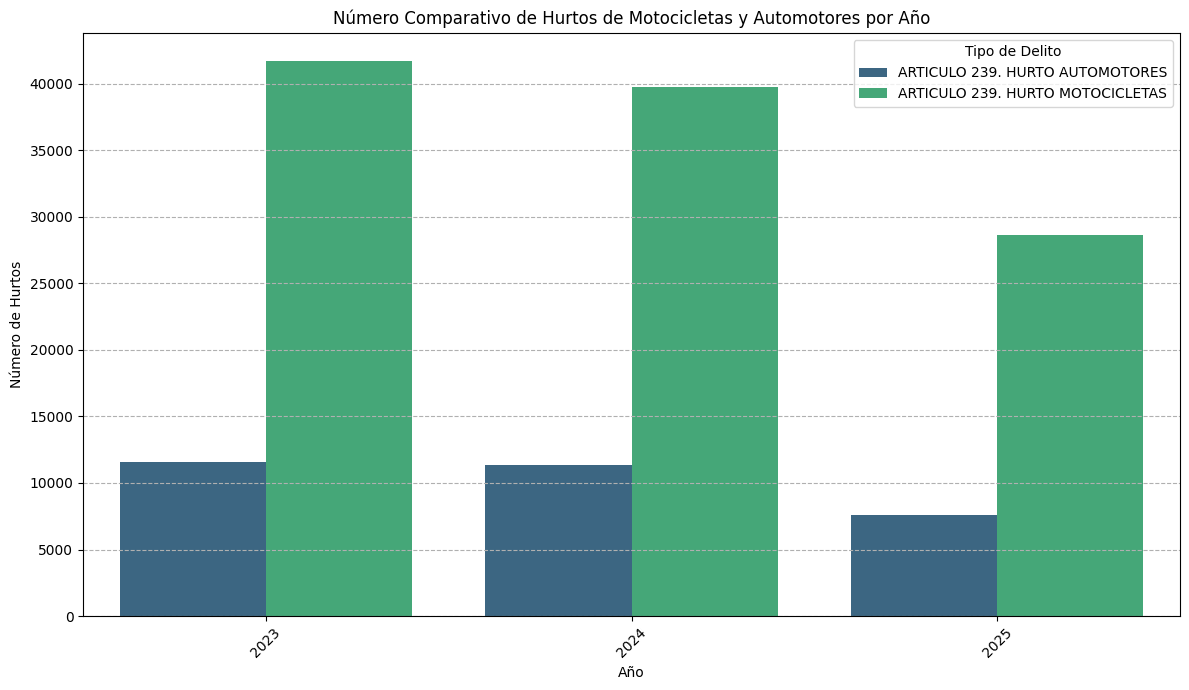

In [ ]:
#  diagrama de barras comparativa de cada año, mostrando numero de hurtos de automotores y de motocicletas

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['YEAR'] = df['FECHA HECHO'].dt.year

# Filter for motorcycle and automobile thefts
thefts_by_type_year = df[df['TIPO DELITO'].isin(['ARTICULO 239. HURTO MOTOCICLETAS', 'ARTICULO 239. HURTO AUTOMOTORES'])]

# Group by year and type of theft, then sum the quantity
thefts_grouped = thefts_by_type_year.groupby(['YEAR', 'TIPO DELITO'])['CANTIDAD'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='YEAR', y='CANTIDAD', hue='TIPO DELITO', data=thefts_grouped, palette='viridis')
plt.title('Número Comparativo de Hurtos de Motocicletas y Automotores por Año')
plt.xlabel('Año')
plt.ylabel('Número de Hurtos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

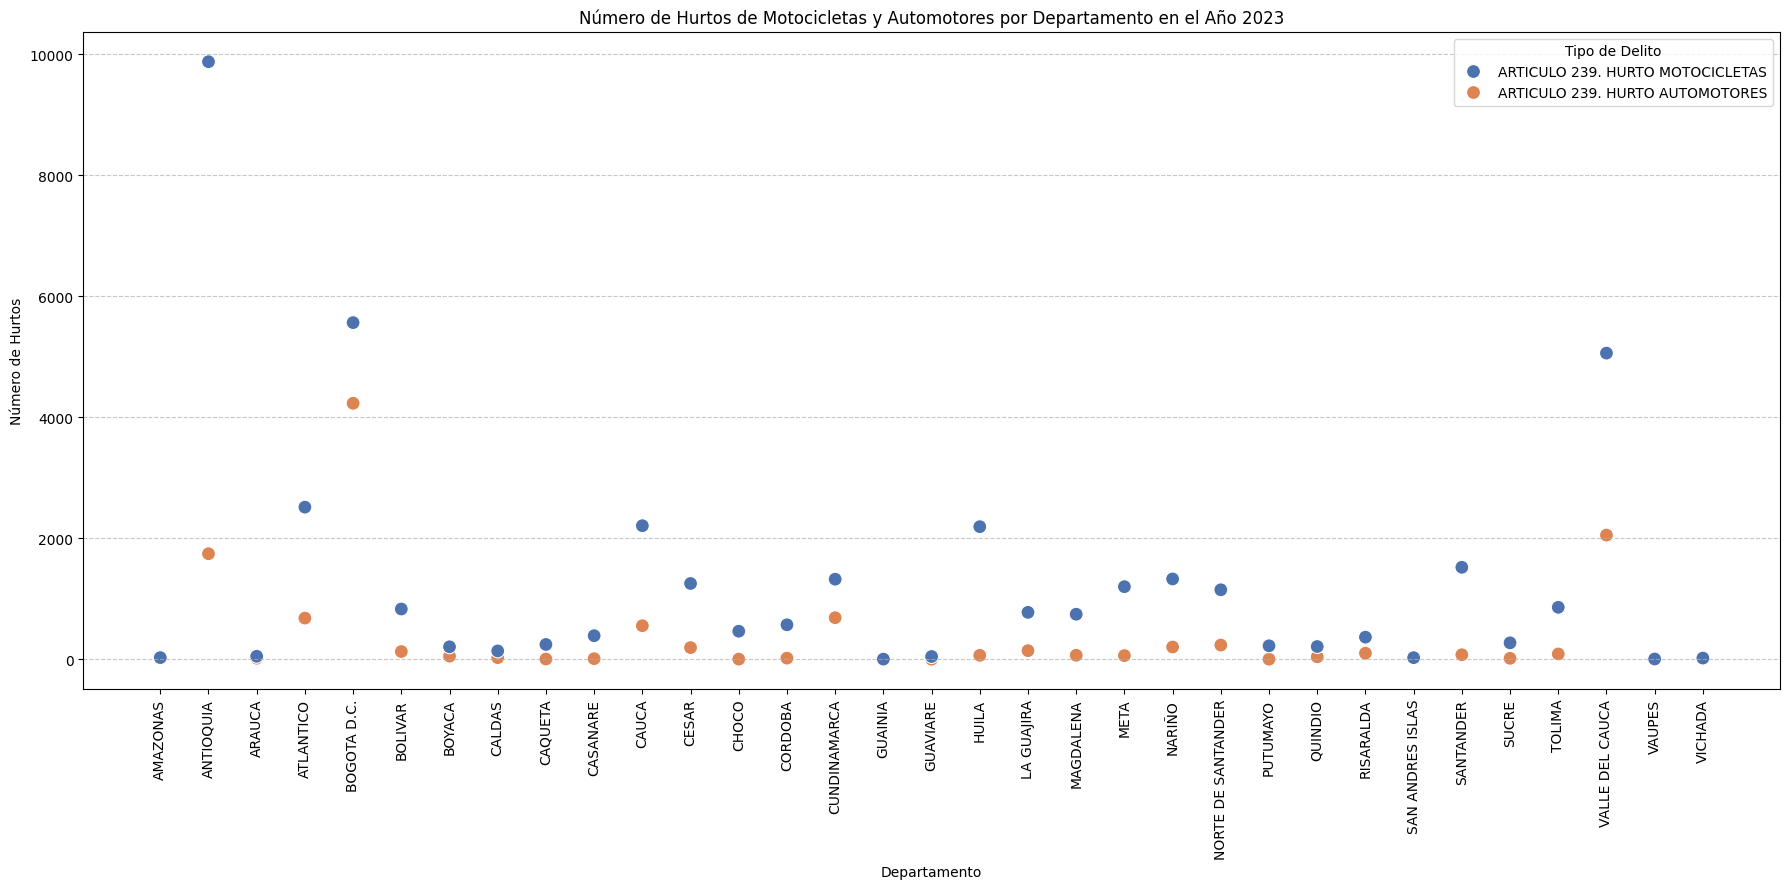

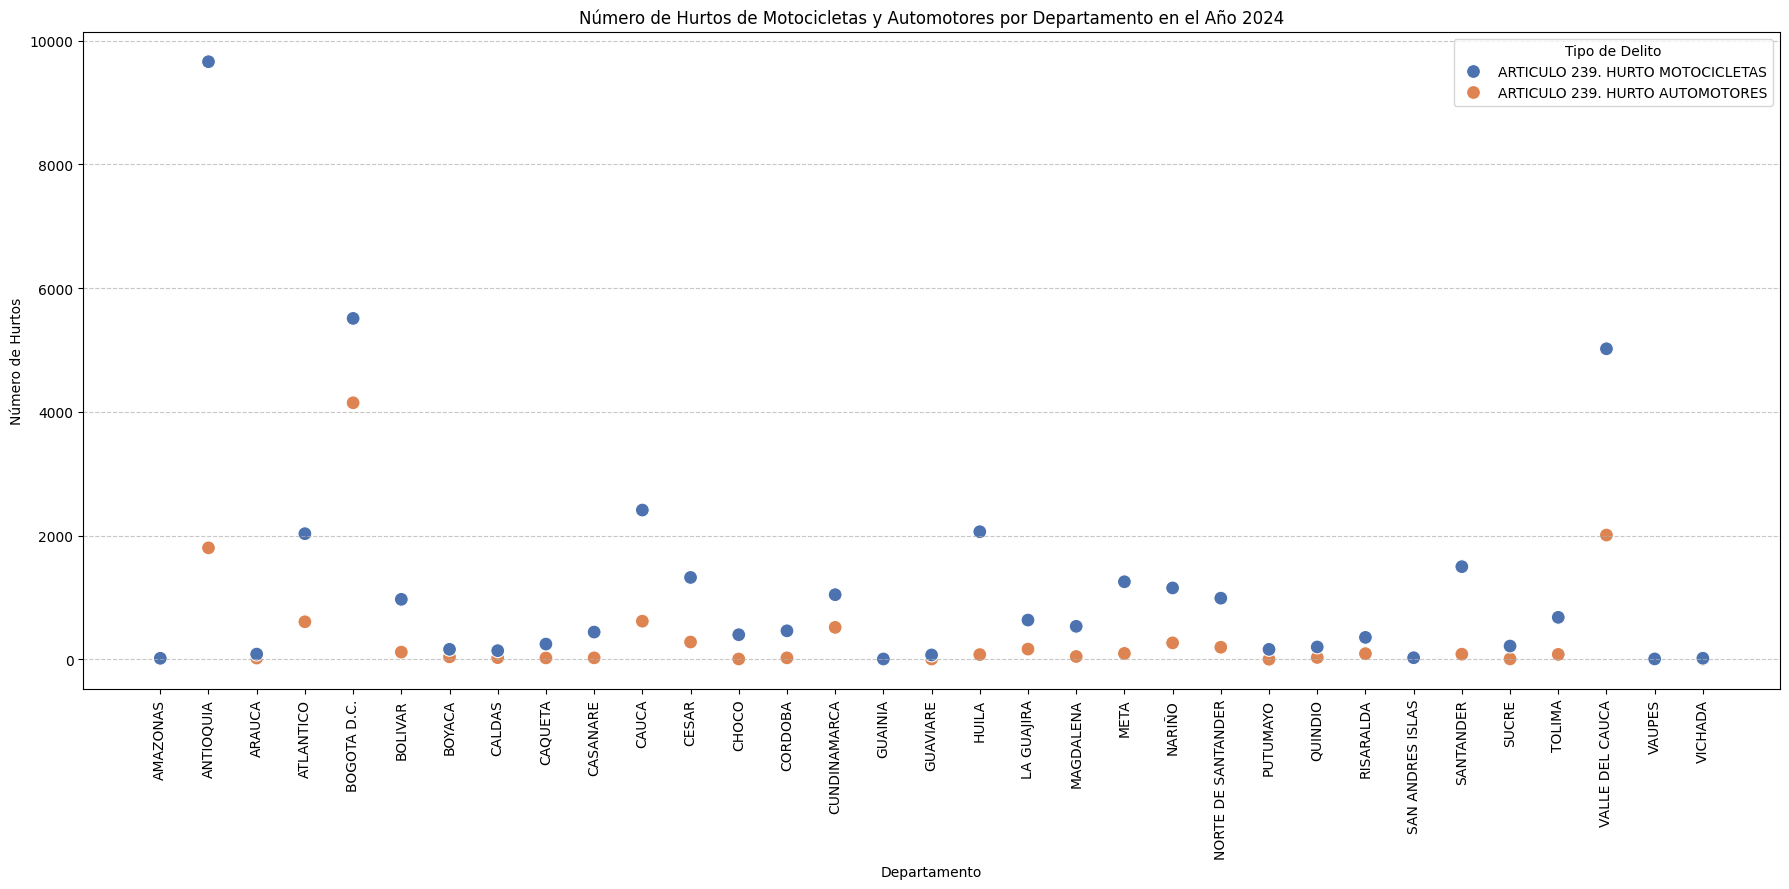

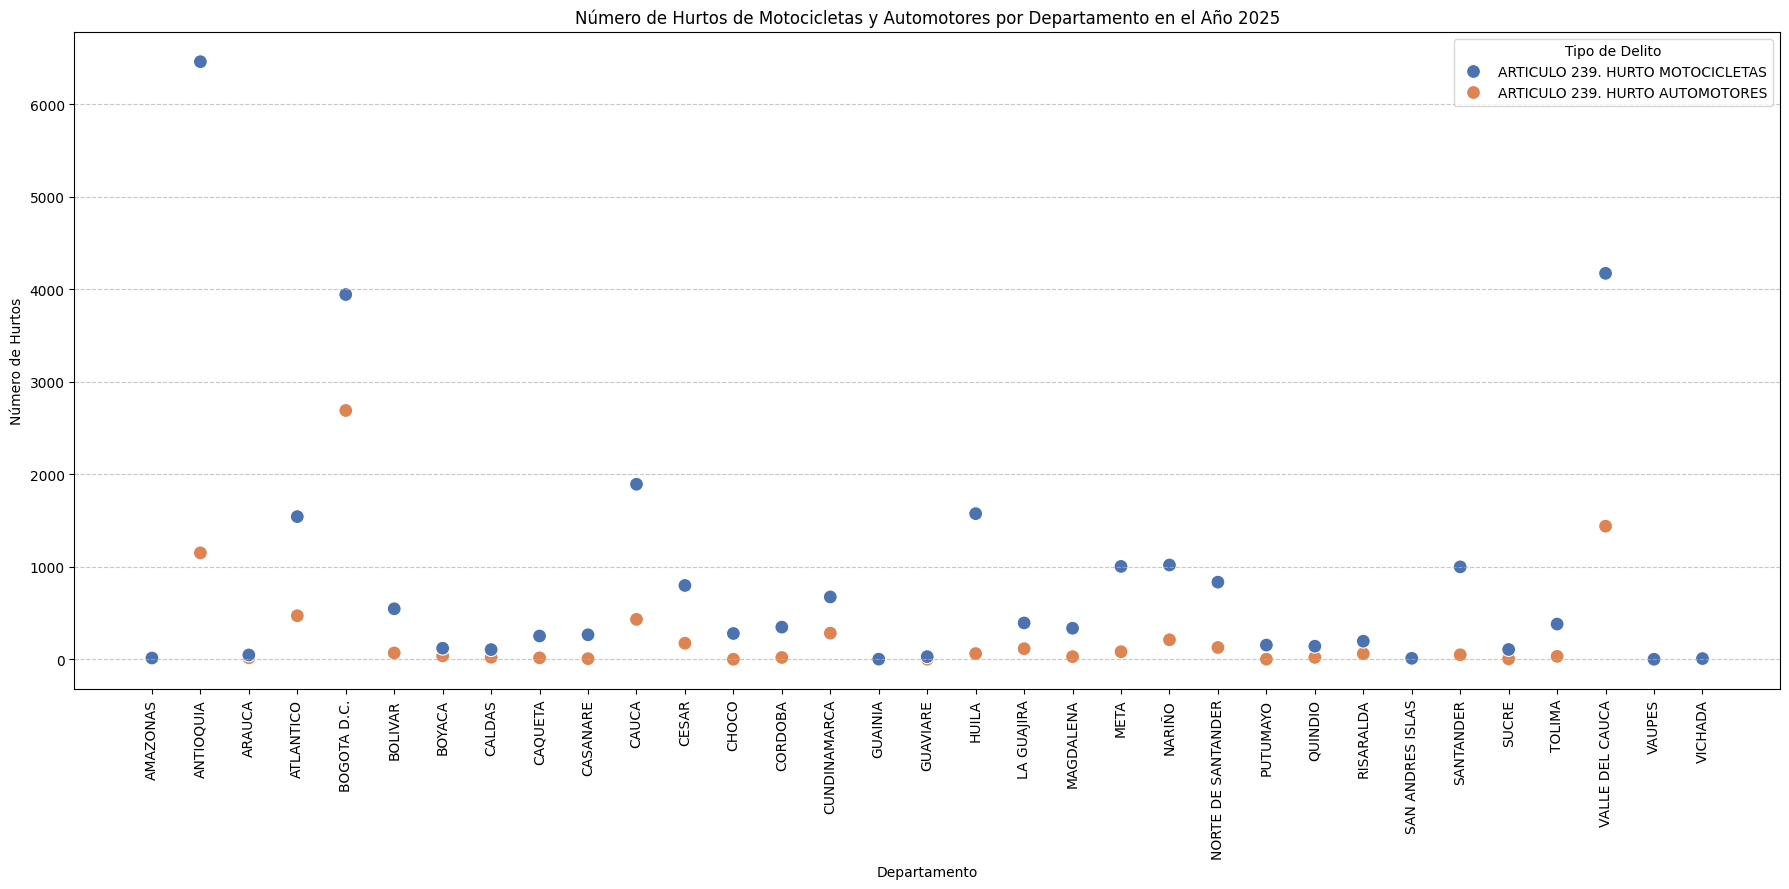

In [ ]:
# Crea tabla de dispersion por cada año, comparando numero de hurtos en departamento, mostrar datos de hurtos de motocicletas y automotores

for year in df['YEAR'].unique():
    df_year_filtered = df[(df['YEAR'] == year) & (df['TIPO DELITO'].isin(['ARTICULO 239. HURTO MOTOCICLETAS', 'ARTICULO 239. HURTO AUTOMOTORES']))]

    if not df_year_filtered.empty:
        thefts_by_department_type = df_year_filtered.groupby(['DEPARTAMENTO', 'TIPO DELITO'])['CANTIDAD'].sum().reset_index()

        plt.figure(figsize=(18, 9))
        sns.scatterplot(x='DEPARTAMENTO', y='CANTIDAD', hue='TIPO DELITO', data=thefts_by_department_type, palette='deep', s=100)
        plt.title(f'Número de Hurtos de Motocicletas y Automotores por Departamento en el Año {year}')
        plt.xlabel('Departamento')
        plt.ylabel('Número de Hurtos')
        plt.xticks(rotation=90)
        plt.legend(title='Tipo de Delito')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay datos de hurtos de motocicletas o automotores para el año {year}.")

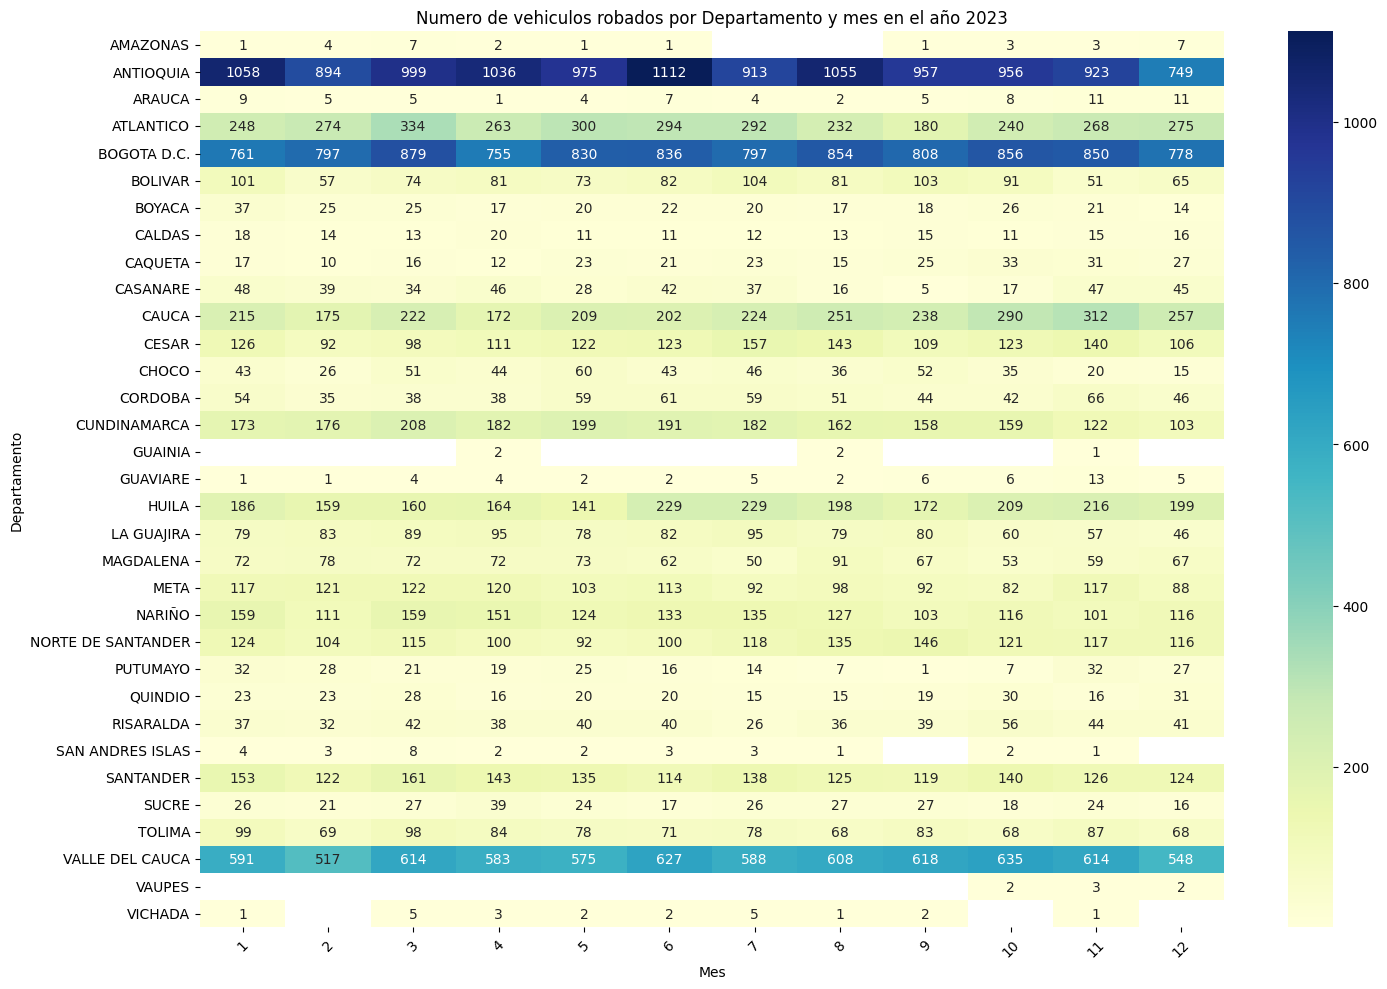

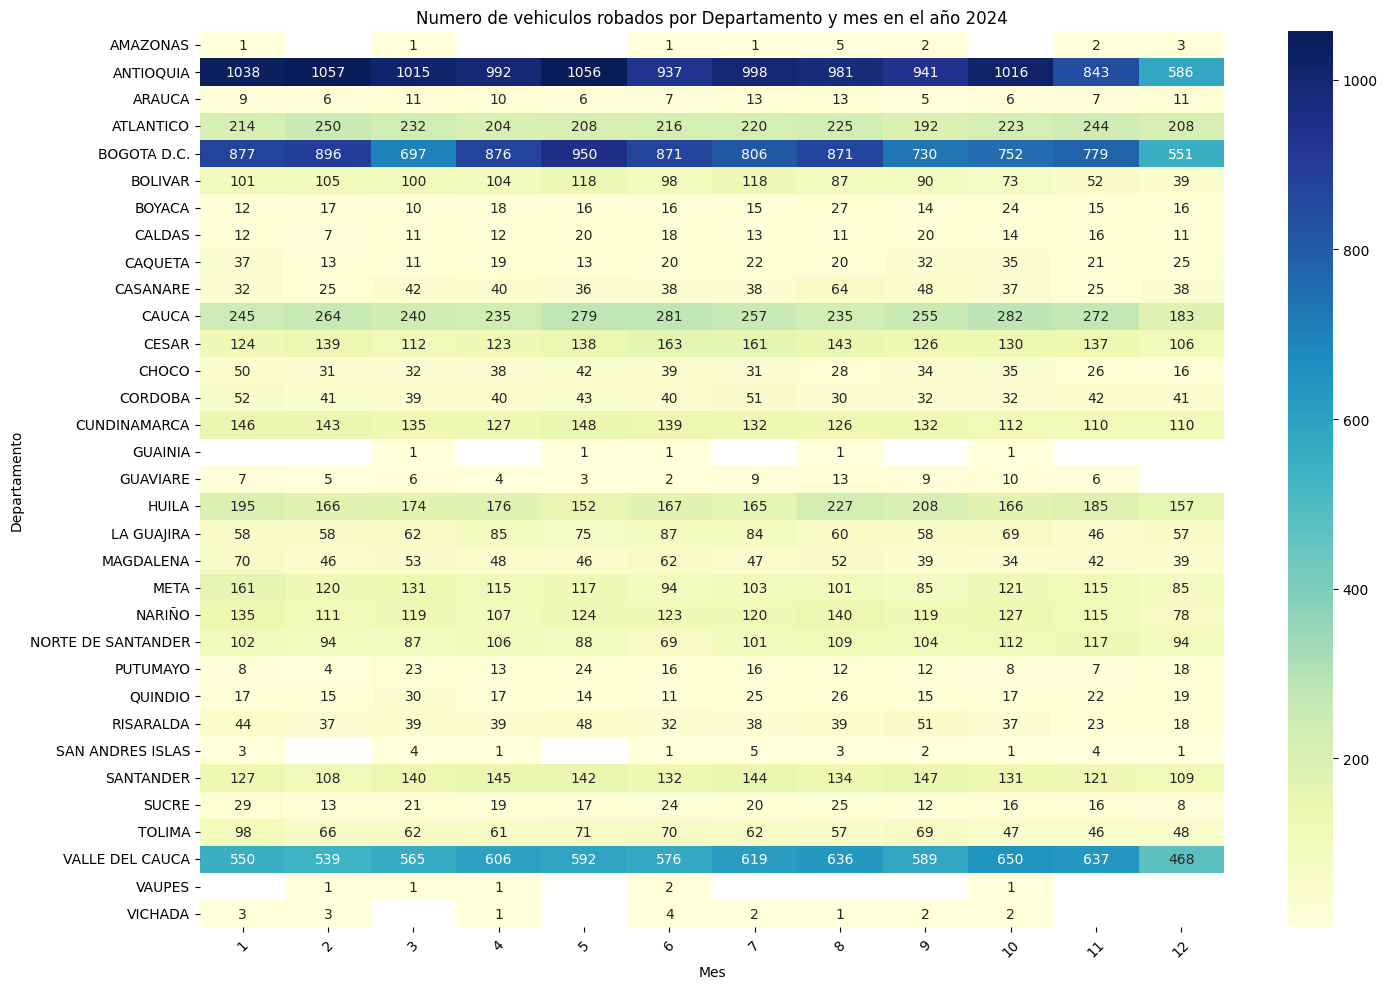

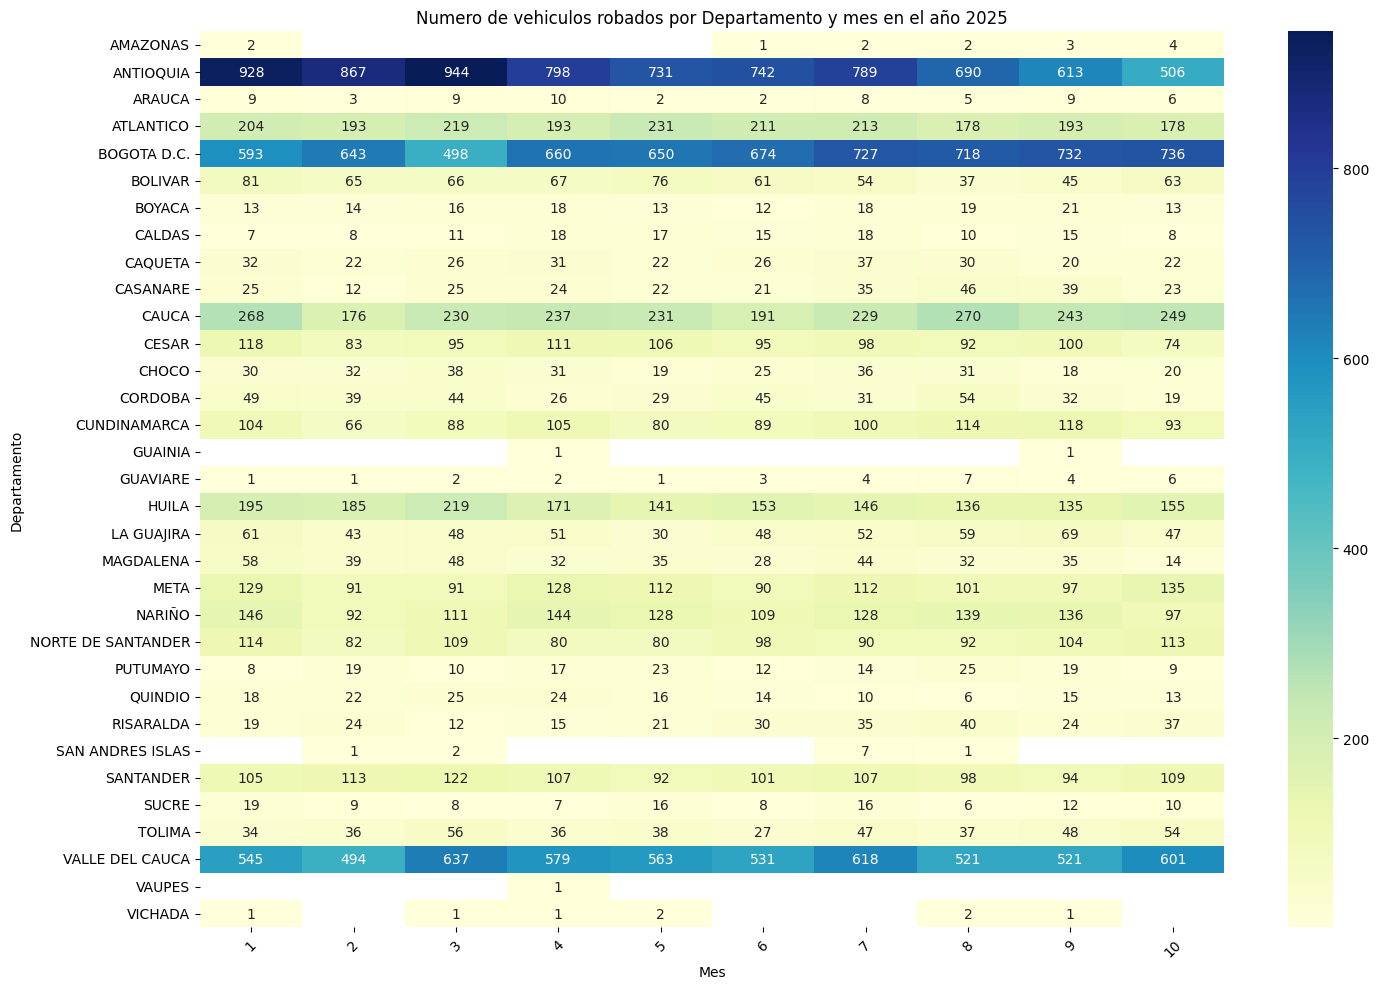

In [ ]:
# Mapa de calor por cada año, comparando numero de hurtos en general por departamentos

# Ensure 'FECHA HECHO' is datetime and 'MES' is created before the loop
# as df might have been reloaded or modified.
# Assuming 'FECHA HECHO' is already converted to datetime from previous steps (iAYA3C0tDB-M)
# If not, add: df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['MES'] = df['FECHA HECHO'].dt.month

for year in df['YEAR'].unique():
    df_year = df[df['YEAR'] == year]
    df_grouped_heatmap_year = df_year.groupby(['DEPARTAMENTO', 'MES'])['CANTIDAD'].sum().reset_index()
    heatmap_data_year = df_grouped_heatmap_year.pivot_table(index='DEPARTAMENTO', columns='MES', values='CANTIDAD')

    plt.figure(figsize=(15, 10))
    sns.heatmap(heatmap_data_year, annot=True, fmt='g', cmap='YlGnBu')
    plt.title(f'Numero de vehiculos robados por Departamento y mes en el año {year}')
    plt.xlabel('Mes')
    plt.ylabel('Departamento')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

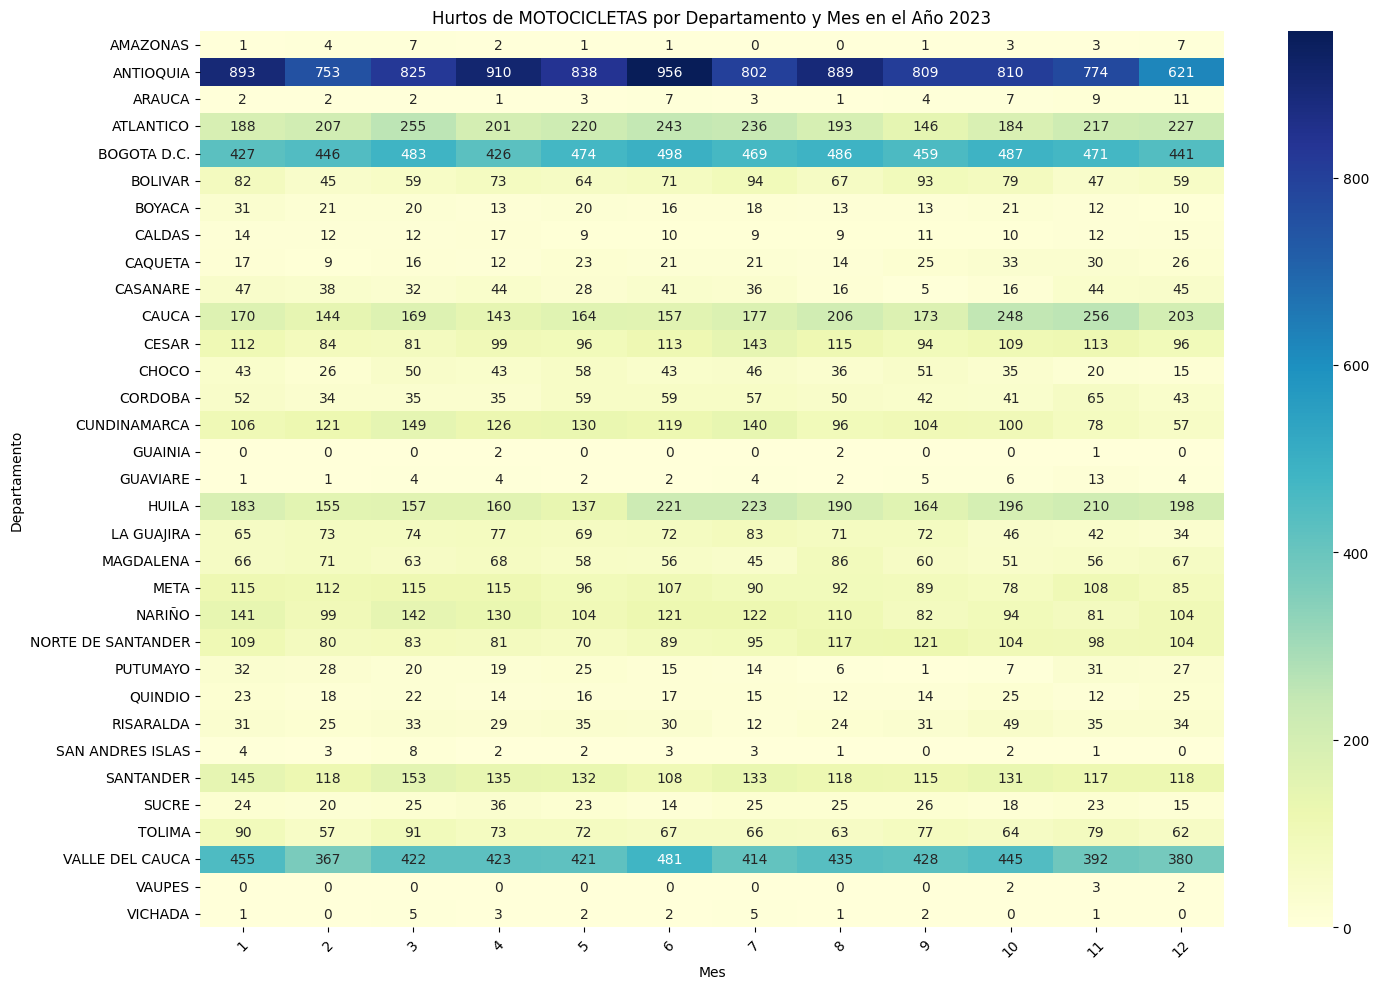

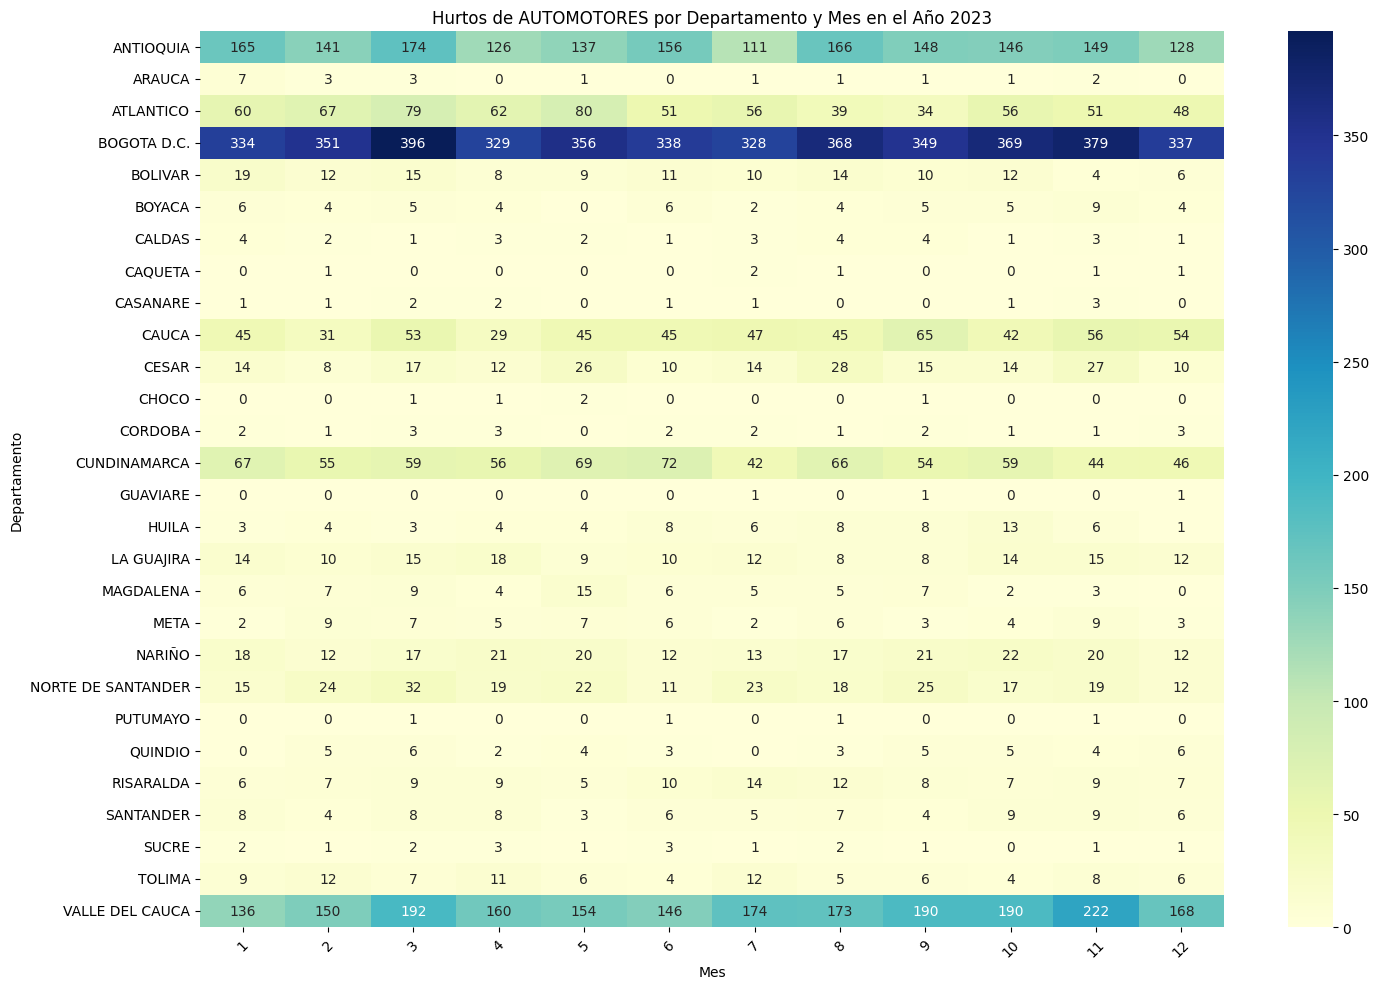

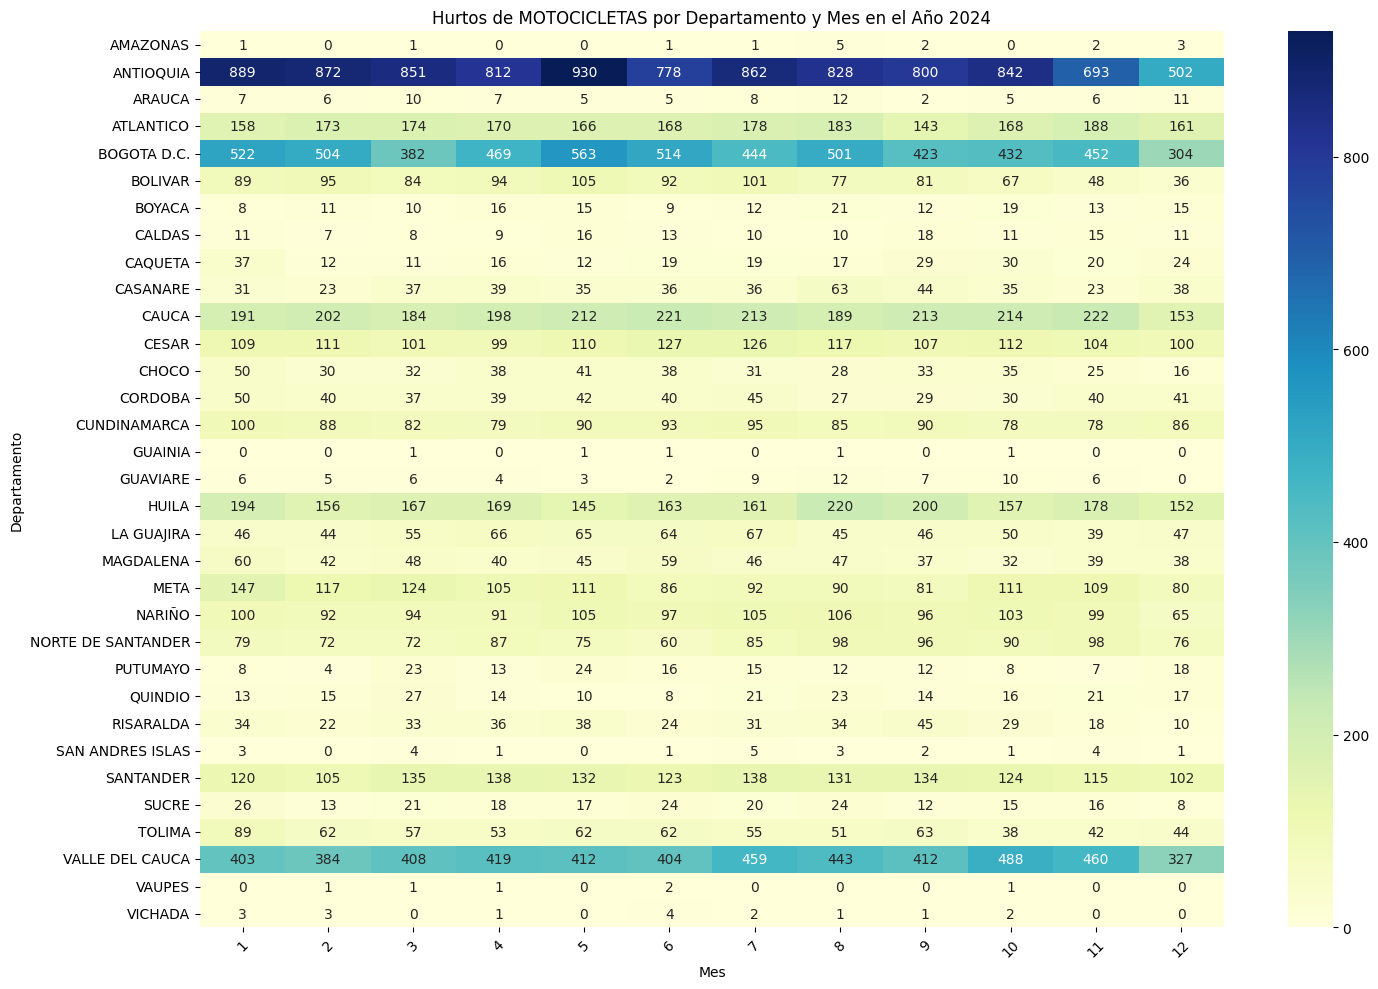

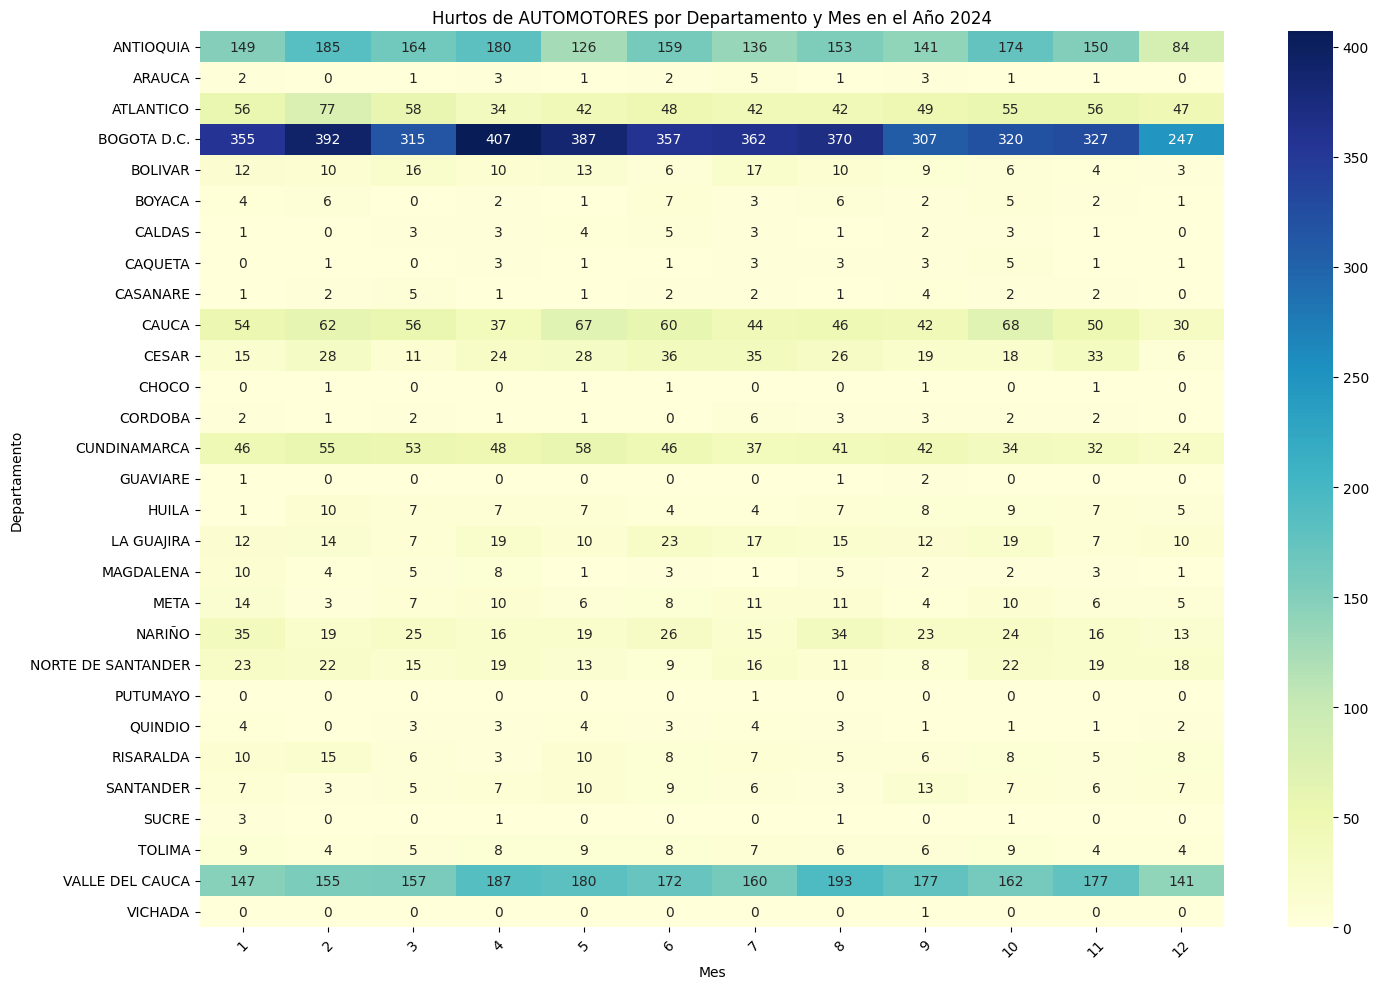

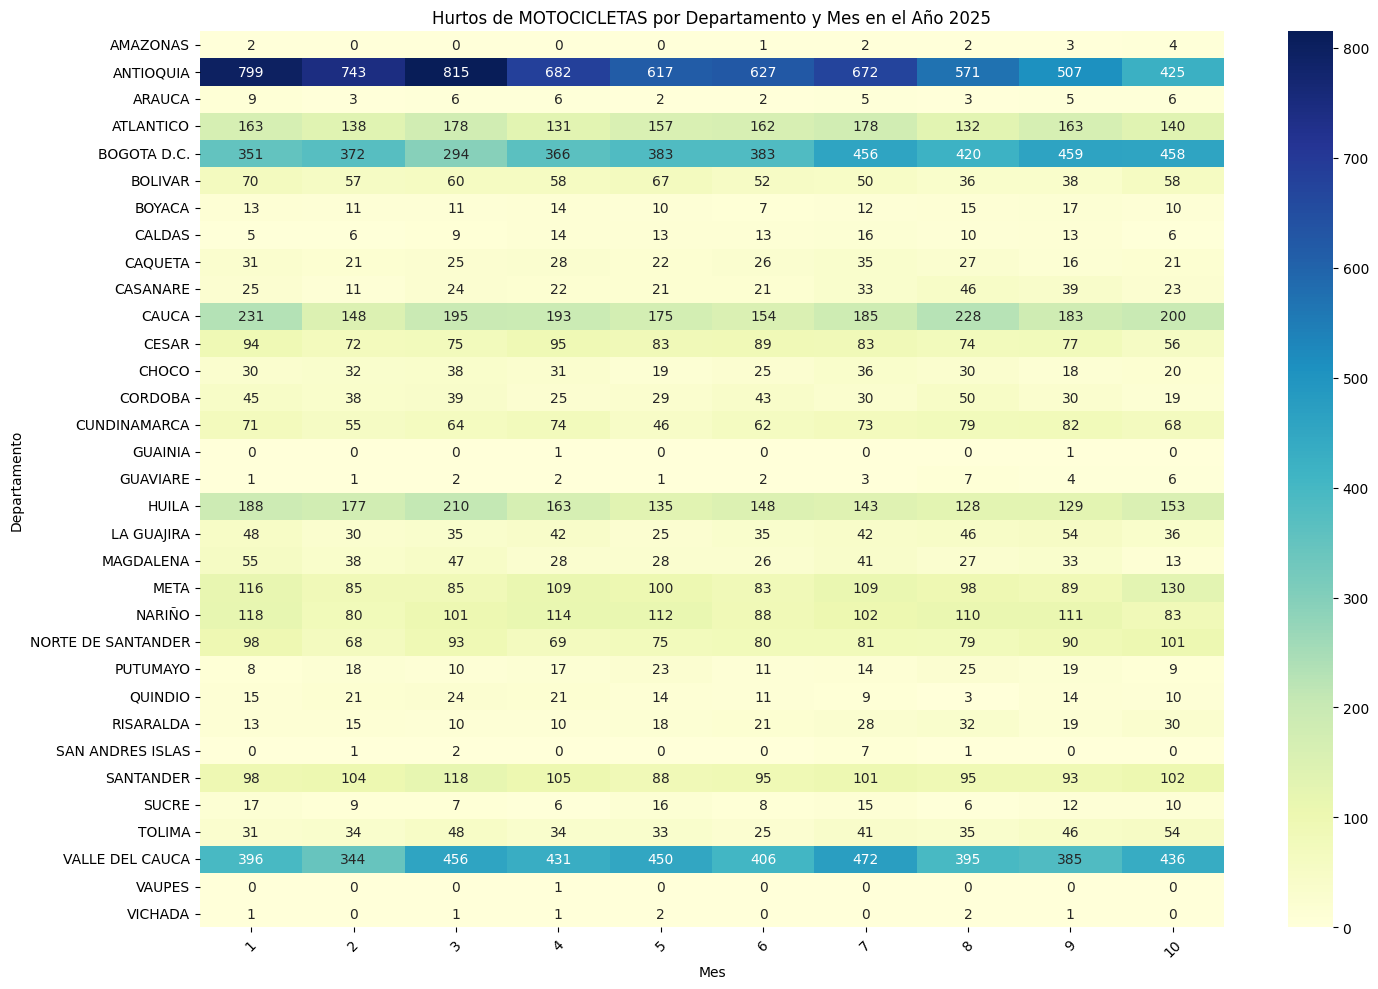

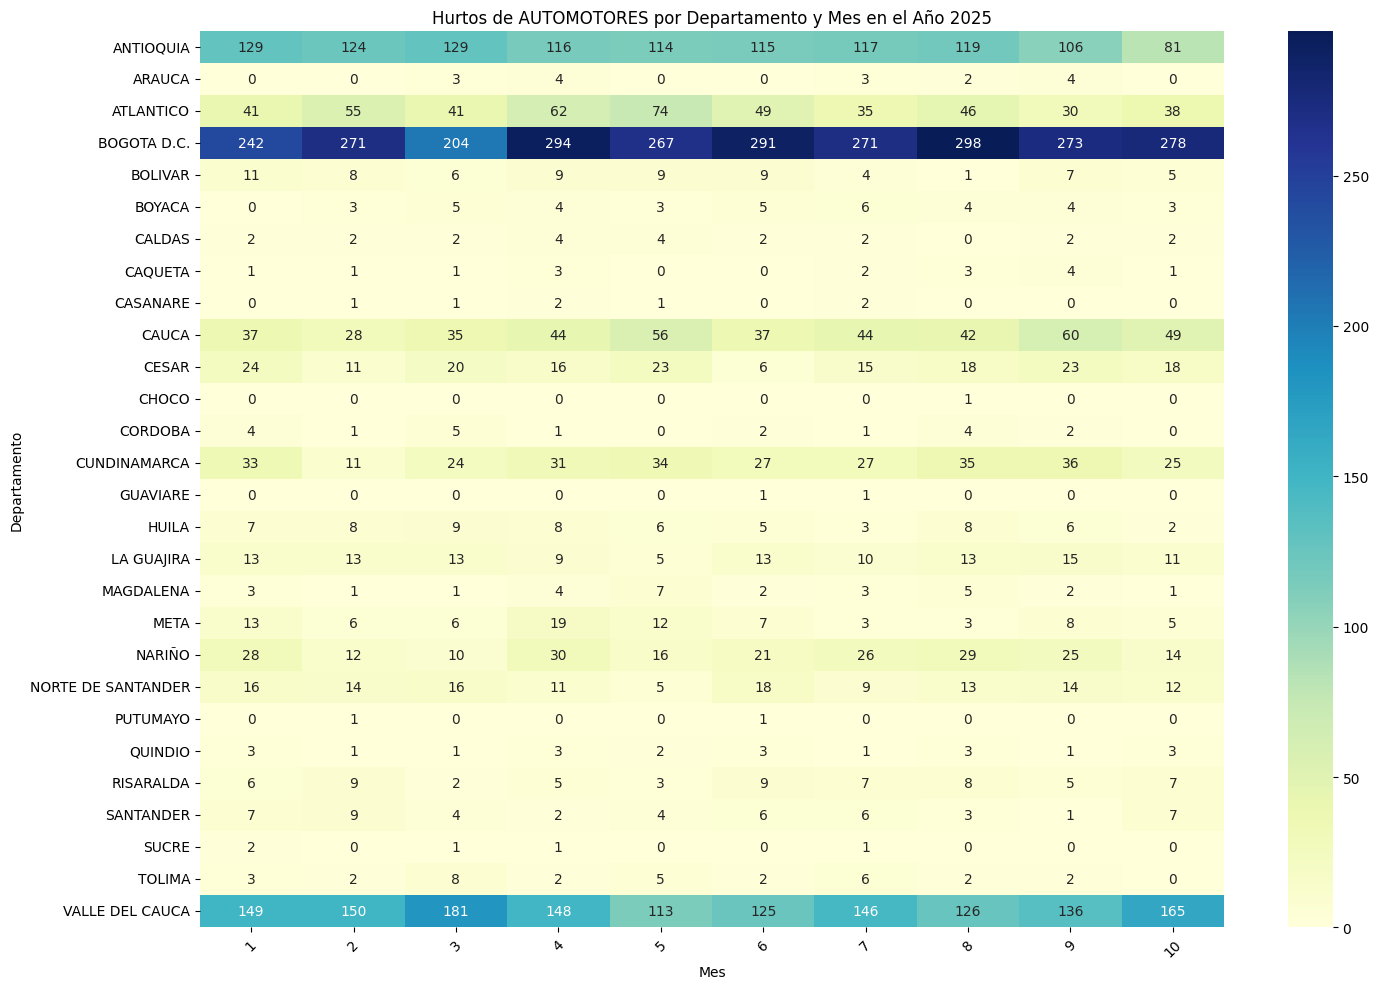

In [ ]:
# Crear mapa de calor por cada año, comparando numero de hurtos por departamentos, mostrar datos de hurtos de motocicletas y de automotores

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['YEAR'] = df['FECHA HECHO'].dt.year
df['MES'] = df['FECHA HECHO'].dt.month

for year in df['YEAR'].unique():
    df_year = df[df['YEAR'] == year]

    # Heatmap for Motorcycle Thefts
    motorcycle_thefts_year = df_year[df_year['TIPO DELITO'] == 'ARTICULO 239. HURTO MOTOCICLETAS']
    if not motorcycle_thefts_year.empty:
        heatmap_data_motorcycle = motorcycle_thefts_year.groupby(['DEPARTAMENTO', 'MES'])['CANTIDAD'].sum().unstack(fill_value=0)
        plt.figure(figsize=(15, 10))
        sns.heatmap(heatmap_data_motorcycle, annot=True, fmt='g', cmap='YlGnBu')
        plt.title(f'Hurtos de MOTOCICLETAS por Departamento y Mes en el Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Departamento')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay datos de hurtos de motocicletas para el año {year}.")

    # Heatmap for Automobile Thefts
    automobile_thefts_year = df_year[df_year['TIPO DELITO'] == 'ARTICULO 239. HURTO AUTOMOTORES']
    if not automobile_thefts_year.empty:
        heatmap_data_automobile = automobile_thefts_year.groupby(['DEPARTAMENTO', 'MES'])['CANTIDAD'].sum().unstack(fill_value=0)
        plt.figure(figsize=(15, 10))
        sns.heatmap(heatmap_data_automobile, annot=True, fmt='g', cmap='YlGnBu')
        plt.title(f'Hurtos de AUTOMOTORES por Departamento y Mes en el Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Departamento')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay datos de hurtos de automotores para el año {year}.")

In [ ]:
# Crear un diagrama de barras por cada año, comparando numero de hurtos por cada mes en Colombia

monthly_thefts_by_year_type = {}

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df['YEAR'] = df['FECHA HECHO'].dt.year
df['MES'] = df['FECHA HECHO'].dt.month

for year in df['YEAR'].unique():
    df_year = df[df['YEAR'] == year]
    thefts_filtered = df_year[df_year['TIPO DELITO'].isin(['ARTICULO 239. HURTO MOTOCICLETAS', 'ARTICULO 239. HURTO AUTOMOTORES'])]

    if not thefts_filtered.empty:
        monthly_thefts = thefts_filtered.groupby(['MES', 'TIPO DELITO'])['CANTIDAD'].sum().reset_index()
        monthly_thefts_by_year_type[year] = monthly_thefts
    else:
        print(f"No hay datos de hurtos de motocicletas o automotores para el año {year}.")

print("Data preparation for monthly comparison charts is complete.")

if monthly_thefts_by_year_type:
    first_year = list(monthly_thefts_by_year_type.keys())[0]
    print(f"\nSample of prepared data for year {first_year}:\n{monthly_thefts_by_year_type[first_year].head()}")

Data preparation for monthly comparison charts is complete.

Sample of prepared data for year 2023:
   MES                       TIPO DELITO  CANTIDAD
0    1   ARTICULO 239. HURTO AUTOMOTORES       943
1    1  ARTICULO 239. HURTO MOTOCICLETAS      3670
2    2   ARTICULO 239. HURTO AUTOMOTORES       922
3    2  ARTICULO 239. HURTO MOTOCICLETAS      3173
4    3   ARTICULO 239. HURTO AUTOMOTORES      1116


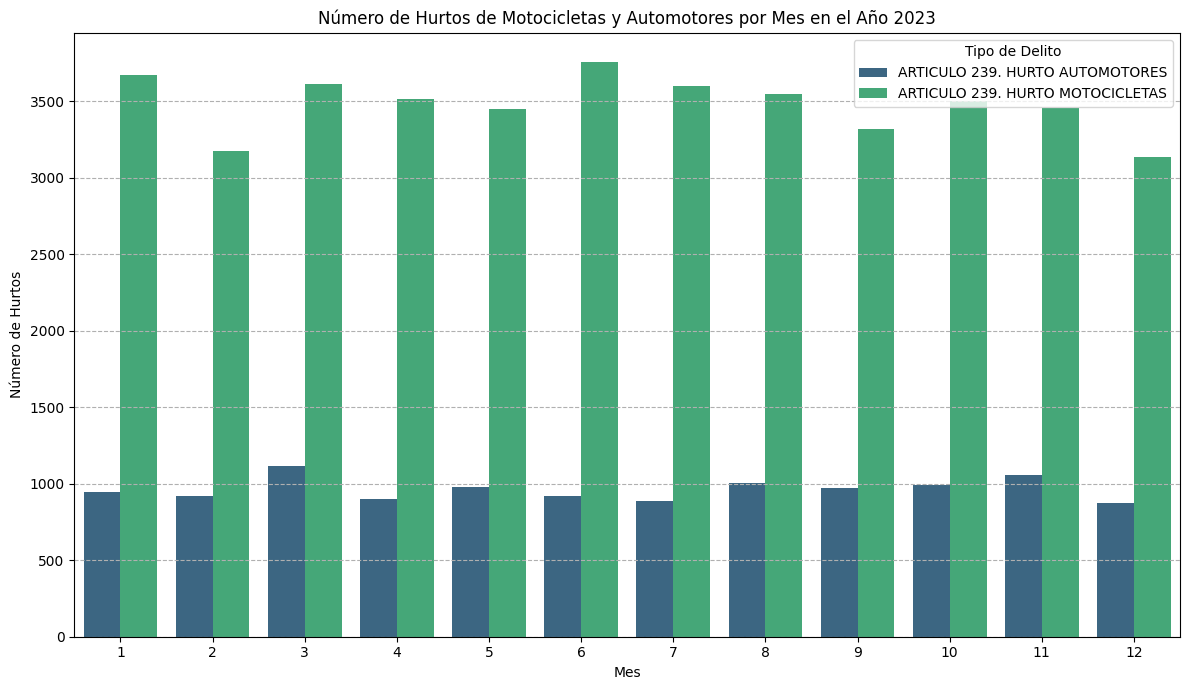

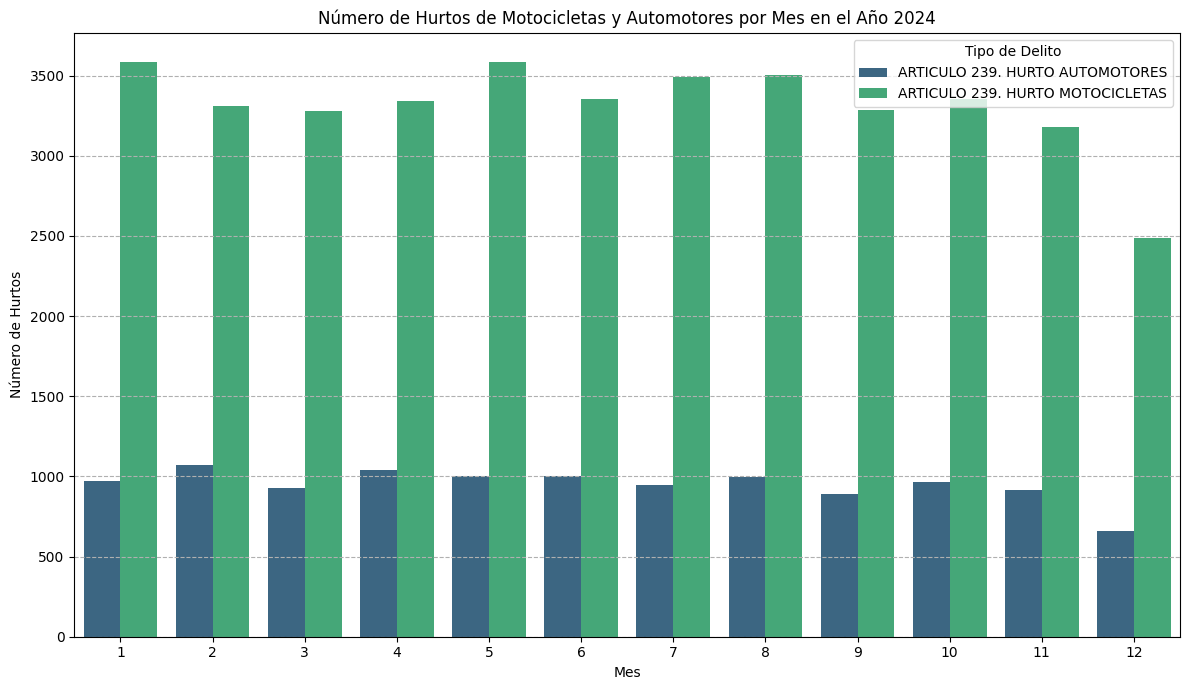

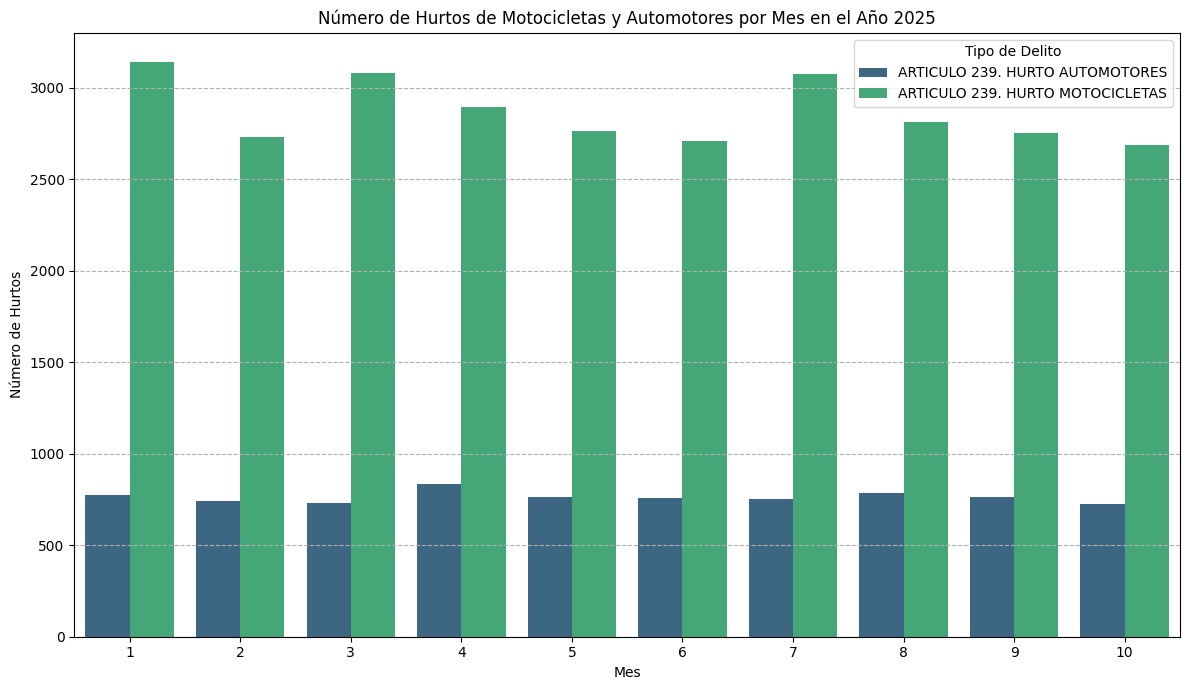

In [ ]:
for year, monthly_grouped in monthly_thefts_by_year_type.items():
    plt.figure(figsize=(12, 7))
    sns.barplot(x='MES', y='CANTIDAD', hue='TIPO DELITO', data=monthly_grouped, palette='viridis')
    plt.title(f'Número de Hurtos de Motocicletas y Automotores por Mes en el Año {year}')
    plt.xlabel('Mes')
    plt.ylabel('Número de Hurtos')
    plt.xticks(rotation=0)
    plt.legend(title='Tipo de Delito')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

# Task
Based on the analysis performed, the final task is to provide a comprehensive summary of motorcycle and automobile theft trends and patterns in Colombia from 2023 to 2025, addressing the following key areas:

*   **Yearly Theft Trends**: Detail the total number of motorcycle and automobile thefts for each year (2023, 2024, 2025), and identify the overall trend (increase, decrease, stability) observed across these years.
*   **Monthly Theft Patterns**: For each year, pinpoint the specific month that recorded the highest number of motorcycle thefts and automobile thefts, highlighting any shifts in these peak months over the three-year period.
*   **Geographical Hotspots and Low-Incidence Areas**: Identify and list the top 3 departments with the highest total number of motorcycle thefts and the top 3 departments with the highest total number of automobile thefts. Additionally, list the departments with the lowest overall theft rates.
*   **Urban vs. Rural Theft Distribution**: Describe how thefts are distributed between urban and rural zones for each year, indicating which type of zone consistently experiences a higher incidence of thefts.
*   **Final Conclusions**: Synthesize all the above findings to draw comprehensive conclusions about the overall patterns, trends, and potential influencing factors of motorcycle and automobile thefts in Colombia during 2023-2025, interpreting the results from the various analyses conducted.

## Summarize Yearly Theft Trends

### Subtask:
Present the total number of motorcycle and automobile thefts per year, identifying overall trends from 2023 to 2025, based on the output from previous analysis cells.


**Reasoning**:
The subtask requires presenting the total number of motorcycle and automobile thefts per year and identifying overall trends. The `motorcycle_thefts_by_year` and `automobile_thefts_by_year` dataframes already contain this information, so I will display them to allow for trend analysis.



In [ ]:
print("Número de hurtos de motocicletas por año:")
print(motorcycle_thefts_by_year)

print("\nNúmero de hurtos de automotores por año:")
print(automobile_thefts_by_year)

Número de hurtos de motocicletas por año:
   YEAR  CANTIDAD
0  2023     41735
1  2024     39757
2  2025     28642

Número de hurtos de automotores por año:
   YEAR  CANTIDAD
0  2023     11562
1  2024     11381
2  2025      7625


### Yearly Theft Trends (2023-2025)

Based on the analysis of motorcycle and automobile thefts from 2023 to 2025, the following trends are observed:

*   **Motorcycle Thefts**:
    *   **2023**: 41,735 thefts
    *   **2024**: 39,757 thefts
    *   **2025**: 28,642 thefts
    *   **Overall Trend**: There has been a consistent **decreasing trend** in motorcycle thefts over the three-year period. The number of thefts dropped from 41,735 in 2023 to 39,757 in 2024, and further significantly to 28,642 in 2025.

*   **Automobile Thefts**:
    *   **2023**: 11,562 thefts
    *   **2024**: 11,381 thefts
    *   **2025**: 7,625 thefts
    *   **Overall Trend**: Similar to motorcycle thefts, automobile thefts also show a clear **decreasing trend**. Starting at 11,562 thefts in 2023, there was a slight decrease to 11,381 in 2024, followed by a more substantial reduction to 7,625 thefts in 2025.

In summary, both motorcycle and automobile thefts in Colombia experienced a positive trend of **decline** from 2023 to 2025.

## Summarize Monthly Theft Patterns

### Subtask:
For each year, identify and present the month with the highest number of motorcycle and automobile thefts, noting any shifts or consistent patterns observed from the previous monthly analysis.


**Reasoning**:
The subtask requires identifying the month with the highest number of motorcycle and automobile thefts for each year. The `monthly_thefts_by_year_type` dictionary contains the grouped monthly theft data for each year and type, so I will iterate through it and extract the peak months as instructed.



In [ ]:
print("\n--- Monthly Theft Patterns ---")

for year, monthly_grouped in monthly_thefts_by_year_type.items():
    # Motorcycle thefts
    motorcycle_thefts = monthly_grouped[monthly_grouped['TIPO DELITO'] == 'ARTICULO 239. HURTO MOTOCICLETAS']
    if not motorcycle_thefts.empty:
        peak_month_motorcycle = motorcycle_thefts.loc[motorcycle_thefts['CANTIDAD'].idxmax()]
        print(f"Year {year}: Peak month for motorcycle thefts is Month {int(peak_month_motorcycle['MES'])} with {int(peak_month_motorcycle['CANTIDAD'])} thefts.")
    else:
        print(f"Year {year}: No motorcycle theft data available.")

    # Automobile thefts
    automobile_thefts = monthly_grouped[monthly_grouped['TIPO DELITO'] == 'ARTICULO 239. HURTO AUTOMOTORES']
    if not automobile_thefts.empty:
        peak_month_automobile = automobile_thefts.loc[automobile_thefts['CANTIDAD'].idxmax()]
        print(f"Year {year}: Peak month for automobile thefts is Month {int(peak_month_automobile['MES'])} with {int(peak_month_automobile['CANTIDAD'])} thefts.")
    else:
        print(f"Year {year}: No automobile theft data available.")


--- Monthly Theft Patterns ---
Year 2023: Peak month for motorcycle thefts is Month 6 with 3760 thefts.
Year 2023: Peak month for automobile thefts is Month 3 with 1116 thefts.
Year 2024: Peak month for motorcycle thefts is Month 5 with 3587 thefts.
Year 2024: Peak month for automobile thefts is Month 2 with 1069 thefts.
Year 2025: Peak month for motorcycle thefts is Month 1 with 3142 thefts.
Year 2025: Peak month for automobile thefts is Month 4 with 832 thefts.


### Monthly Theft Patterns (2023-2025)

Based on the analysis of monthly theft data, the following patterns emerge for peak theft months:

*   **Motorcycle Thefts**:
    *   **2023**: The peak month for motorcycle thefts was **June (Month 6)** with 3,760 thefts.
    *   **2024**: The peak month shifted to **May (Month 5)** with 3,587 thefts.
    *   **2025**: The peak month shifted again to **January (Month 1)** with 3,142 thefts.
    *   **Overall Pattern**: There is no consistent peak month for motorcycle thefts across the three years, indicating a shift in seasonal peaks or influencing factors over time. The number of thefts in the peak month also shows a decreasing trend.

*   **Automobile Thefts**:
    *   **2023**: The peak month for automobile thefts was **March (Month 3)** with 1,116 thefts.
    *   **2024**: The peak month shifted to **February (Month 2)** with 1,069 thefts.
    *   **2025**: The peak month shifted to **April (Month 4)** with 832 thefts.
    *   **Overall Pattern**: Similar to motorcycle thefts, there is no single consistent peak month for automobile thefts, suggesting varying monthly patterns each year. The number of thefts in the peak month for automobiles also shows a decreasing trend.

In conclusion, while both types of thefts show an overall decreasing trend annually, their monthly peak patterns are inconsistent, shifting from year to year. This suggests that the factors influencing monthly theft rates may vary or that prevention efforts might be impacting seasonal peaks differently each year.

## Summarize Geographical Hotspots and Low-Incidence Areas

### Subtask:
List the top 3 departments with the highest number of motorcycle and automobile thefts, and the departments with the lowest overall theft rates, using the results from prior geographical analysis.


**Reasoning**:
The subtask requires displaying the top 3 departments with the highest motorcycle thefts. The `top_motorcycle_thefts` DataFrame already contains this information, so I will display it.



In [ ]:
print("Top 3 departamentos con mayor número de hurtos de MOTOCICLETAS:")
print(top_motorcycle_thefts)

Top 3 departamentos con mayor número de hurtos de MOTOCICLETAS:
DEPARTAMENTO
ANTIOQUIA          25997
BOGOTA D.C.        15019
VALLE DEL CAUCA    14253
Name: CANTIDAD, dtype: int64


**Reasoning**:
The subtask requires displaying the top 3 departments with the highest automobile thefts. The `top_automobile_thefts` DataFrame already contains this information, so I will display it.



In [ ]:
print("\nTop 3 departamentos con mayor número de hurtos de AUTOMOTORES:")
print(top_automobile_thefts)


Top 3 departamentos con mayor número de hurtos de AUTOMOTORES:
DEPARTAMENTO
BOGOTA D.C.        11069
VALLE DEL CAUCA     5502
ANTIOQUIA           4698
Name: CANTIDAD, dtype: int64


**Reasoning**:
The subtask requires displaying the departments with the lowest overall theft rates. The `top_departments` DataFrame already contains this information, so I will display it.



In [ ]:
print("\nTop 3 departamentos con menor numero de hurto de vehiculos:")
print(top_departments)


Top 3 departamentos con menor numero de hurto de vehiculos:
DEPARTAMENTO
GUAINIA    12
VAUPES     14
VICHADA    48
Name: CANTIDAD, dtype: int64


### Geographical Hotspots and Low-Incidence Areas (2023-2025)

Based on the analysis of theft data across departments, the following geographical patterns are observed:

*   **Top 3 Departments for Motorcycle Thefts**:
    1.  **Antioquia**: 25,997 thefts
    2.  **Bogota D.C.**: 15,019 thefts
    3.  **Valle del Cauca**: 14,253 thefts

*   **Top 3 Departments for Automobile Thefts**:
    1.  **Bogota D.C.**: 11,069 thefts
    2.  **Valle del Cauca**: 5,502 thefts
    3.  **Antioquia**: 4,698 thefts

*   **Departments with the Lowest Overall Theft Rates**:
    1.  **Guainia**: 12 thefts
    2.  **Vaupes**: 14 thefts
    3.  **Vichada**: 48 thefts

**Analysis of Overlaps and Patterns**:

There is a significant overlap among the top 3 departments for both motorcycle and automobile thefts: Antioquia, Bogota D.C., and Valle del Cauca consistently appear as high-incidence areas. This suggests that these departments, likely major urban centers or regions with higher population density and economic activity, face a disproportionately higher challenge regarding vehicle thefts overall.

Specifically, Antioquia leads in motorcycle thefts, while Bogota D.C. leads in automobile thefts. Valle del Cauca remains in the top three for both categories. This indicates that while these departments are generally theft hotspots, there might be subtle regional preferences or market dynamics that influence the predominant type of vehicle stolen.

Conversely, departments like Guainia, Vaupes, and Vichada show extremely low numbers of vehicle thefts. These are typically less populated or geographically remote regions, which could contribute to their lower theft rates due to fewer vehicles, less infrastructure, or different socio-economic conditions. The stark contrast between the high-incidence and low-incidence areas highlights the geographical concentration of vehicle theft as a problem primarily affecting specific, more developed regions.

## Summarize Urban vs. Rural Theft Distribution

### Subtask:
Detail the distribution of thefts between urban and rural zones for each year, highlighting which type of zone experiences higher incidence, based on the analysis of theft by zone.


**Reasoning**:
The subtask requires detailing the distribution of thefts between urban and rural zones for each year. The previous analysis in cell `hQpr0Gi6OIQR` already provides this information, so I will print the relevant output to review the data.



In [ ]:
# Determinar por cada año el numero de hurtos en zona rural y urbana

for year in df['YEAR'].unique():
    df_year = df[df['YEAR'] == year]
    hurts_by_zone_year = df_year.groupby('ZONA')['CANTIDAD'].sum().reset_index()
    print(f"\nHurtos por zona en el año {year}:")
    for index, row in hurts_by_zone_year.iterrows():
        print(f"  {row['ZONA']}: {int(row['CANTIDAD'])} hurtos")


Hurtos por zona en el año 2023:
  OTRAS: 2 hurtos
  RURAL: 5541 hurtos
  URBANA: 47754 hurtos

Hurtos por zona en el año 2024:
  RURAL: 5433 hurtos
  URBANA: 45705 hurtos

Hurtos por zona en el año 2025:
  RURAL: 3752 hurtos
  URBANA: 32515 hurtos


#Distribución de Hurtos Urbanos vs. Rurales (2023-2025)
Según el análisis de la distribución de hurtos entre zonas urbanas y rurales para cada año, se observan los siguientes patrones:

2023:

Urbana: 47,754 hurtos

Rural: 5,541 hurtos

Otras: 2 hurtos

2024:

Urbana: 45,705 hurtos

Rural: 5,433 hurtos

2025:

Urbana: 32,515 hurtos

Rural: 3,752 hurtos

Tendencias y Observaciones Constantes:
Mayor Incidencia en Zonas Urbanas: A lo largo de los tres años (2023, 2024 y 2025), las zonas urbanas experimentan sistemáticamente una incidencia de hurtos significativamente mayor en comparación con las zonas rurales. El número de hurtos en áreas urbanas es aproximadamente de 8 a 10 veces mayor que en las áreas rurales cada año.

Tendencia Decreciente en Ambas Zonas: Tanto las zonas urbanas como las rurales muestran una tendencia decreciente en el número de hurtos de 2023 a 2025. Los hurtos urbanos disminuyeron de 47,754 a 32,515, y los hurtos rurales disminuyeron de 5,541 a 3,752.

Proporcionalidad: Aunque las cifras absolutas son mucho más altas en las áreas urbanas, la proporción relativa de hurtos entre las áreas urbanas y rurales se mantiene algo constante, lo que indica que los factores que contribuyen al hurto podrían estar muy extendidos, pero más concentrados en entornos urbanos densamente poblados.

Categoría 'Otras': En 2023, se reportaron 2 hurtos bajo zonas 'OTRAS' (Otras), lo cual es una cantidad insignificante en comparación con las cifras urbanas y rurales y no aparece en años posteriores, lo que sugiere que podría ser una anomalía o una reclasificación en datos posteriores.

Conclusiones Finales: Resumen Integral de las Tendencias de Hurto de Motocicletas y Automóviles en Colombia (2023-2025)
Este análisis de los datos de hurto de motocicletas y automóviles en Colombia de 2023 a 2025 revela patrones y tendencias distintivas en varias dimensiones:

1. Tendencias Anuales de Hurto
Tendencia General: Decreciente: Tanto los hurtos de motocicletas como los de automóviles mostraron una tendencia decreciente constante durante el período de tres años. El total de hurtos (motocicletas + automóviles) descendió de 53,297 en 2023 a 51,138 en 2024, y aún más a 36,267 en 2025.

Hurtos de Motocicletas: Disminuyeron de 41,735 (2023) a 39,757 (2024) y significativamente a 28,642 (2025).

Hurtos de Automóviles: Disminuyeron de 11,562 (2023) a 11,381 (2024) y significativamente a 7,625 (2025).

2. Patrones Mensuales de Hurto
Meses Pico Inconsistentes: No hubo un único mes pico constante para los hurtos de motocicletas o de automóviles a lo largo de los tres años. Los meses pico cambiaron anualmente, lo que sugiere que las variaciones mensuales podrían estar influenciadas por factores dinámicos en lugar de patrones estacionales fijos.

Meses Pico de Motocicletas: Junio (2023), Mayo (2024), Enero (2025).

Meses Pico de Automóviles: Marzo (2023), Febrero (2024), Abril (2025).

El número de hurtos en estos meses pico también siguió la tendencia general decreciente, lo que indica que, aunque existen picos mensuales, su intensidad está disminuyendo.

3. Puntos Críticos Geográficos y Áreas de Baja Incidencia
Puntos Críticos (Hotspots): Los departamentos de Antioquia, Bogotá D.C. y Valle del Cauca aparecen consistentemente como las 3 áreas de mayor incidencia de hurtos, tanto de motocicletas como de automóviles.

Hurtos de Motocicletas: Antioquia (25,997), Bogotá D.C. (15,019), Valle del Cauca (14,253).

Hurtos de Automóviles: Bogotá D.C. (11,069), Valle del Cauca (5,502), Antioquia (4,698).

Bogotá D.C. lidera en hurtos de automóviles, mientras que Antioquia lidera en hurtos de motocicletas, lo que destaca variaciones regionales en los objetivos de hurto. Estas regiones suelen ser grandes centros urbanos con mayores densidades de población y actividad económica.

Áreas de Baja Incidencia: Guainía (12), Vaupés (14) y Vichada (48) registraron las tasas de hurto más bajas en general. Estas son generalmente regiones menos pobladas o más remotas, lo que contribuye a sus cifras significativamente menores de hurto de vehículos.

4. Distribución de Hurtos Urbanos vs. Rurales
Dominio Urbano: Las zonas urbanas experimentaron sistemáticamente una incidencia de hurtos significativamente mayor en comparación con las áreas rurales a lo largo de los tres años. Los hurtos urbanos fueron aproximadamente de 8 a 10 veces más altos que los hurtos rurales anualmente.

Hurtos Urbanos: 47,754 (2023), 45,705 (2024), 32,515 (2025).

Hurtos Rurales: 5,541 (2023), 5,433 (2024), 3,752 (2025).

Tanto las áreas urbanas como las rurales mostraron una tendencia decreciente en los hurtos, manteniendo una distribución proporcional similar a pesar de la disminución general.

Interpretación General y Factores Influyentes
Los datos sugieren firmemente una tendencia positiva de disminución de los hurtos de vehículos en Colombia de 2023 a 2025. Este descenso generalizado en diferentes tipos de vehículos, patrones mensuales y zonas geográficas (tanto urbanas como rurales) podría atribuirse a varios factores:

Medidas de Seguridad Mejoradas: El aumento de la presencia policial, las operaciones dirigidas o los avances tecnológicos en la seguridad de los vehículos podrían estar disuadiendo a los ladrones.

Campañas de Conciencia Pública: Una mayor conciencia pública sobre la prevención del hurto podría llevar a comportamientos más cautelosos por parte de los propietarios de vehículos.

Cambios en las Condiciones Económicas o Sociales: Los cambios económicos o en las estructuras de las organizaciones criminales podrían afectar la frecuencia y los métodos del hurto de vehículos.

Mejoras en la Notificación de Datos: Aunque es menos probable que cause un declive constante, los cambios en la forma en que se recopilan o reportan los datos también podrían desempeñar un papel menor.

A pesar de la tendencia positiva general, el hurto de vehículos sigue concentrado en departamentos principales como Antioquia, Bogotá D.C. y Valle del Cauca, particularmente en las áreas urbanas. Esto indica que, si bien los esfuerzos a nivel nacional están dando resultados, estas áreas de alta incidencia requieren esfuerzos sostenidos y posiblemente intensificados, adaptados a sus dinámicas específicas. La inconsistencia de los patrones mensuales de hurto máximo también sugiere que las estrategias de prevención deben ser flexibles y adaptables, en lugar de estrictamente estacionales.